# **Proyecto de Fintech:**

## Introducción

***

## **Diccionario:**

Descripcion de las columnas del DataFrame.

1. **trans_date_trans_time:** Marca de tiempo de la transacción (fecha y hora en que ocurrió la transacción).  
2. **cc_num:** Número de la tarjeta de crédito (hash o anonimizado).  
3. **merchant:** Comerciante o tienda donde ocurrió la transacción.  
4. **category:** Tipo de transacción (ej. supermercado, entretenimiento).  
5. **amt:** Monto de la transacción.  
6. **first:** Nombre del titular de la tarjeta.  
7. **last:** Apellido del titular de la tarjeta.  
8. **gender:** Género del titular de la tarjeta.  
9. **street:** Detalles de la dirección del titular de la tarjeta.  
10. **city:** Ciudad donde reside el titular de la tarjeta.  
11. **state:** Estado donde reside el titular de la tarjeta.  
12. **zip:** Código postal del titular de la tarjeta.  
13. **lat:** Latitud de la dirección del titular de la tarjeta.  
14. **long:** Longitud de la dirección del titular de la tarjeta.  
15. **city_pop:** Población de la ciudad del titular de la tarjeta.  
16. **job:** Ocupación o profesión del titular de la tarjeta.  
17. **dob:** Fecha de nacimiento del titular de la tarjeta.  
18. **trans_num:** Identificador único de la transacción.  
19. **unix_time:** Marca de tiempo de la transacción en Unix (segundos desde la época Unix, útil para cálculos de tiempo).  
20. **merch_lat:** Latitud de la ubicación del comerciante.  
21. **merch_long:** Longitud de la ubicación del comerciante.  
22. **is_fraud:** Indicador de si la transacción fue fraudulenta (1 para fraudulenta, 0 para no fraudulenta).  
23. **merch_zipcode:** Código postal del comerciante.

***

## Importación de librerías

In [1]:
#Importar librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
import datetime
from datetime import timedelta
from haversine import haversine
from dateutil.relativedelta import relativedelta


## Carga y Procesamiento de Datos 

In [2]:
#Se importa el dataframe, especificando qué columnas incluir (todas menos 'Unnamed: 0')
df = pd.read_csv('credit_card_transactions.csv', usecols=lambda column: column != 'Unnamed: 0')

In [3]:
df.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


In [4]:
#Se modifica el seteo para poder observar la totalidad de Columnas, Filas y Ancho de las Celdas.

# Muestra todas las columnas
pd.set_option('display.max_columns', None)

# Muestra todas las filas
pd.set_option('display.max_rows', None) 

# Limita el ancho de cada columna a 50 caracteres
pd.set_option('display.max_colwidth', None)  

# Formatear los valores para que se muestren como números en lugar de notación científica
pd.options.display.float_format = '{:,.2f}'.format

In [5]:
#Tamaño del DataFrame
df_tamaño = df.size

#Forma, Columnas y FIlas
df_forma = df.shape

# Suma los datos ausentes de cada columna
datos_faltantes = df.isna().sum().sort_values(ascending=False)

# Calcula el total de datos los nulos
total_faltantes = datos_faltantes.sum()

# Porcentaje Total de los datos faltantes
porcentaje_faltantes = round((total_faltantes / df_tamaño) * 100, 2)

# Impresión en pantalla de los resultados

# Crea variable con numero de duplicados
cantidad_duplicados = df.duplicated().sum()


#Se imprimen los resultados de las características generales del dataframe
print(f'El DataFrame posee un total de {df_tamaño} Celdas')
print(f'El DataFrame posee un Total de:\n\n-Columnas: {df_forma[1]} \n-Filas: {df_forma[0]}')
print('---------------------------------------------------------------------')
print(f'La cantidad de Filas Duplicadas es: {cantidad_duplicados}')
print('---------------------------------------------------------------------')
print(f'Faltantes totales: {total_faltantes}')
print(f'Porcentaje Total de Faltantes: {porcentaje_faltantes}%')
print()
print(f'Faltantes por Columnas (primeras 5):\n{datos_faltantes.head()}\n')


El DataFrame posee un total de 29823525 Celdas
El DataFrame posee un Total de:

-Columnas: 23 
-Filas: 1296675
---------------------------------------------------------------------
La cantidad de Filas Duplicadas es: 0
---------------------------------------------------------------------
Faltantes totales: 195973
Porcentaje Total de Faltantes: 0.66%

Faltantes por Columnas (primeras 5):
merch_zipcode            195973
cc_num                        0
trans_date_trans_time         0
category                      0
amt                           0
dtype: int64



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

**Comentarios:**

- El DataFrame posee un total de __1296675__ registros y __23__ columnas), unicamente posee una sola columna con datos nulos, la columna'merch_zipcode'.

- Se puede observar que hay columnas que deberan modificarse para mejor su tratamiento, ``'trans_date_trans_time', 'dob', 'unix_time'`` que corresponden a datos de tiempo, se encuentran en otro formato. Igualmente con merch_zipcode que es seria de tipo int64. 

- Además, se creará una columna 'age', que permita la clasificación de los clientes en función de su edad con el objetivo de observar la distribución de fraudes por edad

- La única columna con valores faltantes es '__merch_zipcode__', con un total de 195,973 registros ausentes, lo que representa un 0.66% del total de los datos. Dado que este porcentaje es relativamente bajo, es importante evaluar si la ausencia de esta información afecta de manera significativa los registros clasificados como fraudulentos. Un análisis detallado sobre cómo estos valores nulos podrían influir en la detección de fraudes permitirá decidir si es necesario aplicar técnicas de imputación, eliminación de registros, o si su impacto es lo suficientemente marginal como para ser ignorado


In [7]:
# Convertir la columna 'trans_date_trans_time' a formato datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Verificar el tipo de dato modificado
print(f"Tipo de dato modificado, columna 'trans_date_trans_time': {df['trans_date_trans_time'].dtype}")

# Convertir 'dob' a formato datetime 
df['dob'] = pd.to_datetime(df['dob'])

# Verificar el tipo de dato modificado
print(f"Tipo de dato modificado, columna 'dob': {df['dob'].dtype}")


Tipo de dato modificado, columna 'trans_date_trans_time': datetime64[ns]
Tipo de dato modificado, columna 'dob': datetime64[ns]


In [8]:
# Convertir 'unix_time' en formato de fecha legible
df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')

def ajustar_anio(fecha):
    """
    Ajusta el año de una fecha para corregir fechas incorrectas en los registros.

    Esta función está diseñada para corregir fechas en los años 2012 y 2013, sumando
    7 años a la fecha. Si la fecha está en un año diferente, la función la devuelve
    sin cambios. Además, si ocurre un error al intentar ajustar el año (por ejemplo,
    cuando la fecha es el 29 de febrero de un año bisiesto que no existe en el nuevo
    año), se corrige el problema sumando manualmente 7 años en días.

    Parámetros:
    ----------
    fecha : pandas.Timestamp
        La fecha original que se desea ajustar.

    Retorna:
    -------
    pandas.Timestamp
        La fecha ajustada, ya sea con el año corregido o sumando manualmente días en
        caso de errores de calendario.

    Ejemplos:
    ---------
    >>> ajustar_anio(pd.Timestamp('2012-02-29'))
    Timestamp('2019-02-28 00:00:00')

    >>> ajustar_anio(pd.Timestamp('2012-06-15'))
    Timestamp('2019-06-15 00:00:00')

    >>> ajustar_anio(pd.Timestamp('2014-06-15'))
    Timestamp('2014-06-15 00:00:00')
    
    Notas:
    ------
    La corrección se hace para fechas en los años 2012 y 2013, sumando 7 años.
    Si el ajuste directo de año provoca un error (como un 29 de febrero no válido),
    se utiliza `timedelta` para sumar 7 años equivalentes en días.
    """
    try:
        # Si el año es 2012 o 2013, ajusta el año sumando 7
        if fecha.year in [2012, 2013]:
            return fecha.replace(year=fecha.year + 7)
        else:
            return fecha
    except ValueError:
        # Si hay un error (por ejemplo, un 29 de febrero), ajustamos sumando días
        return fecha + timedelta(days=365 * 7)

# Aplicar la función de ajuste a la columna 'unix_time'
df['unix_time'] = df['unix_time'].apply(ajustar_anio)

In [9]:
# Obtener la fecha de hoy
hoy = datetime.datetime.today()

# Crear la columna 'age' calculando la diferencia en años
df['age'] = df['dob'].apply(lambda x: relativedelta(hoy, x).years)

# Definir los límites de las clasificaciones de edad
bins_2 = [18, 29, 49, 69, 99]  # Límites de las edades
labels_2 = ['Jóvenes adultos (19-29)', 'Adultos (30-49)', 'Adultos mayores (50-69)', 'Tercera edad (70-99)']  # Etiquetas correspondientes

# Crear la columna 'age_classification' utilizando .loc
df.loc[:, 'age_classification'] = pd.cut(df['age'], bins=bins_2, labels=labels_2, right=True)

In [10]:
# Calcula la fecha minima
fecha_minima = df['trans_date_trans_time'].min()

# Calcula la fecha Maxima
fecha_maxima = df['trans_date_trans_time'].max()

# Calcula cantidad de días entre las fechas max y min
periodo_transacciones = abs(fecha_minima - fecha_maxima)

# Calcula el tiempo aproximado en días
periodo_transacciones_año = periodo_transacciones.days / 365

# Imprime por pantalla los resultados
print(f'La fecha minima es: {fecha_minima}')
print(f'La fecha maxima es: {fecha_maxima}')
print(f'Cantidad de dias: {periodo_transacciones}')
print(f'El periodo de transacciones analizadas es aproximado: {round(periodo_transacciones_año, 2)} años')

La fecha minima es: 2019-01-01 00:00:18
La fecha maxima es: 2020-06-21 12:13:37
Cantidad de dias: 537 days 12:13:19
El periodo de transacciones analizadas es aproximado: 1.47 años


In [11]:
# Convertir la columna 'merch_zipcode' al tipo Int64
df['merch_zipcode'] = df['merch_zipcode'].astype('Int64')

# Verificar el tipo de dato de la columna después de la conversión
print(f"Tipo de Dato Modificado: {df['merch_zipcode'].dtype}")

Tipo de Dato Modificado: Int64


In [12]:
#Reemplaza _ en la columna categorías
df['category'] = df['category'].str.replace('_',' ') 

Se realizaron las siguientes transformaciones:

- **Convertir** ``trans_date_trans_time`` y dob a tipo ````datetime````:
La conversión de estas columnas a tipo de dato ``datetime`` permitirá realizar operaciones con fechas y facilitará los análisis temporales.

- **Convertir** ``merch_zipcode`` a tipo ``int64``:
Asegurar que la columna de códigos postales sea del tipo de dato adecuado (enteros) ayudará a garantizar la integridad de los datos y permitirá el análisis geográfico basado en códigos postales.

- **Convertir** ``unix_time`` de segundos a ``datetime``:
La conversión de los valores de tiempo Unix a un formato ``datetime`` permitirá un análisis temporal más preciso y facilitará la comparación con otras fechas en el dataset.

- **Crear** `la columna ``age`` a partir de la columna dob, y se crea la columna ``age_classification`` para agrupar a los clientes en función de la edad

- **Eliminar** las ``_`` en la columna category para facilitar la graficación

***

### Se crean funciones para graficar

In [13]:
colors=['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
        '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc']

#Grafico de barras
def graficas_barras (df, column_1, column_2, colors, title, xlabel, ylabel, orientation):
    fig = go.Figure(data=[
        go.Bar(
            x=df[column_1],  # Cambiar a valores del DataFrame
            y=df[column_2],  # Cambiar a valores del DataFrame
            orientation=orientation,
            marker=dict(color=colors, line=dict(color='black', width=0.5)),
            #customdata=df[column_2],
            #hovertemplate='No. fraudes %{customdata}<extra></extra>'
        )
    ])
    fig.update_layout(
    title={
        'text': title,
        'font': {
            'family': 'Roboto',
            'size': 24,
            'color': 'black'
            },
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'pad': {'b': 90}
        },
    xaxis_title={
            'text': xlabel,
            'font': {
                'family': 'Roboto',
                'size': 18,
                'color': 'black'
            }
            },
    yaxis_title={
        'text': ylabel,
        'font': {
            'family': 'Roboto',
            'size': 18,
                'color': 'black'
                },
            'standoff': 10    
            },
    yaxis=dict(automargin=True),
    template='plotly_white',
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Roboto",
        font_color='black'
        ),
    margin=dict(l=70, r=30, t=75, b=30),
    width=850,
    height=450
    )
    
    return fig
    
# Crear la gráfica de barras apiladas con Plotly

def graficas_barras_apiladas (df,name_legend_x, name_legend_y, column_1, column_2, column_3, title, xlabel, ylabel):
    fig = go.Figure(data=[
        go.Bar(name=name_legend_x, x=df[column_1], y=df[column_2], marker_color='#5b3e80'),
        go.Bar(name=name_legend_y, x=df[column_1], y=df[column_3], marker_color='#9b6ba9')
        ])
    fig.update_layout(
        title={
            'text': title,
            'font': {
                'family': 'Roboto',
                'size': 24,
                'color': 'black'
                },
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'pad': {'b': 90}
            },
        xaxis_title={
            'text': xlabel,
            'font': {
                'family': 'Roboto',
                'size': 18,
                'color': 'black'
                }
            },
        yaxis_title={
            'text': ylabel,
            'font': {
                'family': 'Roboto',
                'size': 18,
                'color': 'black'
                },
            'standoff': 10   
            },
        yaxis=dict(automargin=True),
        template='plotly_white',
        hoverlabel=dict(
            bgcolor="white",
            font_size=16,
            font_family="Roboto",
            font_color='black'
            ),
        margin=dict(l=70, r=30, t=75, b=30),
        width=900,
        height=450
        )
    
    return fig

def graficas_barras_agrupadas (df,legend_1, legend_2, legend_3, legend_4, legend_5, column_1, column_2, column_3, column_4, 
                               column_5, column_6, title, xlabel, ylabel):
    fig = go.Figure(data=[
        go.Bar(name=legend_1, x=df[column_1], y=df[column_2], marker_color='#5b3e80'),
        go.Bar(name=legend_2, x=df[column_1], y=df[column_3], marker_color='#9b6ba9'),
        go.Bar(name=legend_3, x=df[column_1], y=df[column_4], marker_color='#9977b6'),
        go.Bar(name=legend_4, x=df[column_1], y=df[column_5], marker_color='#b4a6bf'),
        go.Bar(name=legend_5, x=df[column_1], y=df[column_6], marker_color='#d1aebf')
        ])

    fig.update_layout(
        title={
            'text': title,
            'font': {
                'family': 'Roboto',
                'size': 24,
                'color': 'black'
                },
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'pad': {'b': 90}
            },
        xaxis_title={
            'text': xlabel,
            'font': {
                'family': 'Roboto',
                'size': 18,
                'color': 'black'
                }
            },
        yaxis_title={
            'text': ylabel,
            'font': {
                'family': 'Roboto',
                'size': 18,
                'color': 'black'
                },
            'standoff': 10   
            },
        yaxis=dict(automargin=True),
        template='plotly_white',
        hoverlabel=dict(
            bgcolor="white",
            font_size=16,
            font_family="Roboto",
            font_color='black'
            ),
        margin=dict(l=70, r=30, t=75, b=30),
        width=900,
        height=450
        )
    
    return fig

*** 

## Análisis General por Tipo de Datos

In [14]:
# Columnas según tipo de variable 'object'
columnas_cualitativa = df.select_dtypes(include=['object']).columns
print(f'Variables tipo Cualitativa:\n{columnas_cualitativa}\n')

# Columnas según tipo de variable 'int64'
columnas_cuantitativa = df.select_dtypes(include=['int64', 'float64']).columns
print(f'Variables tipo Cuantitativa:\n{columnas_cuantitativa}\n')

# Columnas según tipo de variable 'datetime64'
columnas_tiempo = df.select_dtypes(include=['datetime64']).columns
print(f'Variables tipo Tiempo:\n{columnas_tiempo}')

Variables tipo Cualitativa:
Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num'],
      dtype='object')

Variables tipo Cuantitativa:
Index(['cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat',
       'merch_long', 'is_fraud', 'merch_zipcode', 'age'],
      dtype='object')

Variables tipo Tiempo:
Index(['trans_date_trans_time', 'dob', 'unix_time'], dtype='object')


### Datos Cuantitativos

In [15]:
# Se Filtran las columnas necesarias para el análisis estadísticos
df[['amt', 'city_pop', 'dob']].describe()

,amt,city_pop,dob
count,"1,296,675.00","1,296,675.00",1296675
mean,70.35,"88,824.44",1973-10-03 19:02:55.017178512
min,1.00,23.00,1924-10-30 00:00:00
25%,9.65,743.00,1962-08-13 00:00:00
50%,47.52,"2,456.00",1975-11-30 00:00:00
75%,83.14,"20,328.00",1987-02-22 00:00:00
max,"28,948.90","2,906,700.00",2005-01-29 00:00:00
std,160.32,"301,956.36",NaN


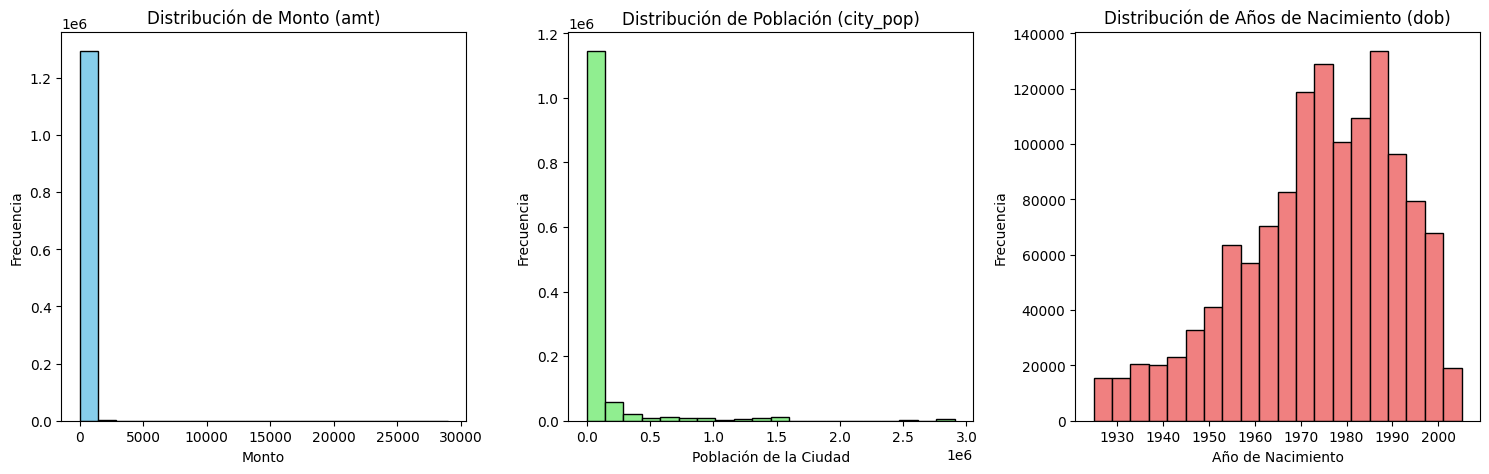

In [16]:
# Crear los histogramas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma del monto de transacciones (amt)
axs[0].hist(df['amt'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Monto (amt)')
axs[0].set_xlabel('Monto')
axs[0].set_ylabel('Frecuencia')

# Histograma de la población de las ciudades (city_pop)
axs[1].hist(df['city_pop'], bins=20, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribución de Población (city_pop)')
axs[1].set_xlabel('Población de la Ciudad')
axs[1].set_ylabel('Frecuencia')

# Histograma del año de nacimiento (dob)
axs[2].hist(df['dob'], bins=20, color='lightcoral', edgecolor='black')
axs[2].set_title('Distribución de Años de Nacimiento (dob)')
axs[2].set_xlabel('Año de Nacimiento')
axs[2].set_ylabel('Frecuencia')

# Ajustar el layout
plt.tight_layout()
plt.show()

#### **Análisis Estadístico de las Variables `amt`, `city_pop` y `dob`**

#### **Monto de las Transacciones (`amt`)**
- **Total de Datos**: 1,296,675 registros.
- **Media**: El valor promedio de las transacciones es de **$70.35**, lo que sugiere que la mayoría de las transacciones tienden a ser relativamente pequeñas.
- **Desviación Estándar**: **$160.32**, lo cual indica una alta variabilidad en los montos de las transacciones. Esto sugiere la presencia de transacciones tanto muy bajas como excepcionalmente altas.
- **Rango**: 
  - **Mínimo**: $1.00
  - **Máximo**: $28,948.90
  - La diferencia significativa entre el valor mínimo y el máximo también refleja la dispersión en los montos.
- **Percentiles**:
  - El **25%** de las transacciones tiene un valor menor o igual a **$9.65**.
  - El **50%** (mediana) de las transacciones es menor o igual a **$47.52**, lo que significa que la mitad de las transacciones no supera este valor.
  - El **75%** de las transacciones tiene un valor menor o igual a **$83.14**, lo que indica que solo una cuarta parte de las transacciones superan este monto.

#### **Población de la Ciudad (`city_pop`)**
- **Total de Datos**: 1,296,675 registros.
- **Media**: La población promedio de las ciudades en este conjunto de datos es **88,824** habitantes.
- **Desviación Estándar**: **301,956**, lo que indica una gran dispersión entre las poblaciones de las ciudades. Este valor sugiere la presencia de grandes ciudades con poblaciones significativamente mayores en comparación con las ciudades más pequeñas.
- **Rango**: 
  - **Mínimo**: 23 habitantes.
  - **Máximo**: 2,906,700 habitantes, reflejando la presencia de grandes ciudades en el conjunto de datos.
- **Percentiles**:
  - El **25%** de las ciudades tiene una población menor o igual a **743** habitantes.
  - El **50%** de las ciudades tiene una población menor o igual a **2,456** habitantes.
  - El **75%** de las ciudades tiene una población menor o igual a **20,328** habitantes. Esto indica que la mayoría de las transacciones ocurren en ciudades más pequeñas, aunque el promedio está influenciado por algunas grandes ciudades.

#### **Año de Nacimiento (`dob`)**
- **Total de Datos**: 1,296,675 registros.
- **Media**: El año promedio de nacimiento es aproximadamente el año **1950** (redondeado).
- **Desviación Estándar**: **17.39 años**, lo que indica una distribución relativamente amplia en los años de nacimiento.
- **Rango**: 
  - **Mínimo**: 19 (aparentemente representando años de nacimiento más antiguos).
  - **Máximo**: 99, lo que podría indicar que los datos incluyen individuos de hasta 99 años de edad.
- **Percentiles**:
  - El **25%** de los registros corresponde a personas nacidas antes del año **1983** (37 años o más).
  - El **50%** corresponde a personas nacidas antes del año **1972** (48 años o más).
  - El **75%** corresponde a personas nacidas antes del año **1960** (62 años o más), lo que sugiere que la mayoría de las transacciones están asociadas con individuos mayores.

#### **Conclusión:**
Este análisis revela que:
- Las transacciones tienen una gran variabilidad en términos de monto.
- Las ciudades involucradas en las transacciones varían ampliamente en tamaño, pero la mayoría de las transacciones ocurren en ciudades pequeñas.
- La distribución de los años de nacimiento muestra una concentración de usuarios de entre 40 y 60 años, siendo la mayoría mayores de 48 años.


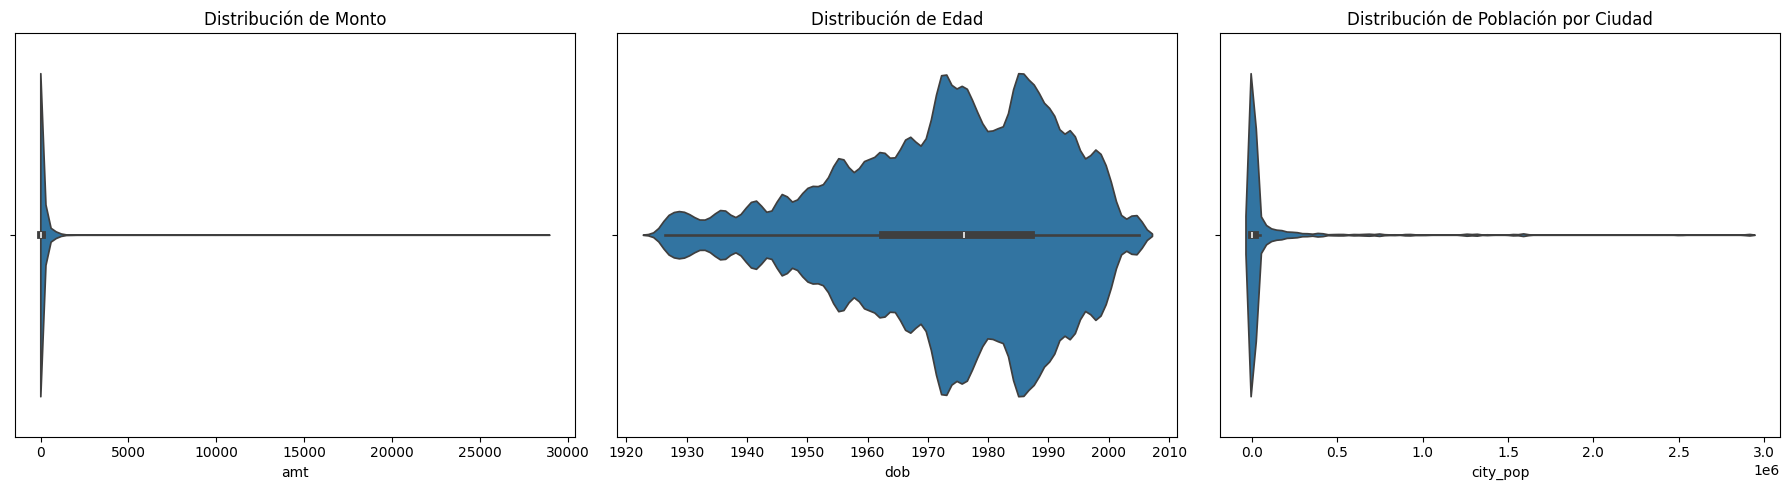

In [17]:
# Crear una figura con 1 fila y 3 columnas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Tres gráficos en una fila

# Crear los violin plots para cada columna
sns.violinplot(ax=axes[0], x=df['amt'])
axes[0].set_title('Distribución de Monto')

sns.violinplot(ax=axes[1], x=df['dob'])
axes[1].set_title('Distribución de Edad')

sns.violinplot(ax=axes[2], x=df['city_pop'])
axes[2].set_title('Distribución de Población por Ciudad')

# Ajustar el diseño
plt.tight_layout()

# Mostrar la figura con los 3 violinplots
plt.show()

In [18]:
# Iterar sobre las variables seleccionadas
for variable in ['amt', 'city_pop', 'dob']:
    # Calcular los cuartiles (Q1 y Q3)
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)

    # Calcular el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Calcular los límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers = df[(df[variable] < limite_inferior) | (df[variable] > limite_superior)]

    # Imprimir resultados
    print(f'Los cuartiles, rango y límites para la variable "{variable}" son: \nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLímite Superior: {limite_superior}\nLímite Inferior: {limite_inferior}')
    print(f"\nOutliers detectados para {variable}: {len(outliers)}")
    print(outliers[variable].head())
    print("\n" + "-"*40 + "\n")

Los cuartiles, rango y límites para la variable "amt" son: 
Q1: 9.65
Q3: 83.14
IQR: 73.49
Límite Superior: 193.375
Límite Inferior: -100.58499999999998

Outliers detectados para amt: 67290
2    220.11
9    198.39
16   327.00
17   341.67
36   207.36
Name: amt, dtype: float64

----------------------------------------

Los cuartiles, rango y límites para la variable "city_pop" son: 
Q1: 743.0
Q3: 20328.0
IQR: 19585.0
Límite Superior: 49705.5
Límite Inferior: -28634.5

Outliers detectados para city_pop: 242674
9     151785
12    341043
19    124967
22     71485
24     95015
Name: city_pop, dtype: int64

----------------------------------------

Los cuartiles, rango y límites para la variable "dob" son: 
Q1: 1962-08-13 00:00:00
Q3: 1987-02-22 00:00:00
IQR: 8959 days 00:00:00
Límite Superior: 2023-12-08 12:00:00
Límite Inferior: 1925-10-27 12:00:00

Outliers detectados para dob: 547
5953    1924-10-30
14633   1924-10-30
16029   1924-10-30
19573   1924-10-30
20161   1924-10-30
Name: dob, dtyp

### **Observaciones sobre las Variables:**

1. **monto**:  
   La variable **`amt`** presenta una gran dispersión en sus valores, lo que sugiere una amplia variedad en el monto de las transacciones. Sin embargo, también se observan varios **outliers**, lo que podría indicar transacciones con valores extremadamente elevados, o en su defecto, errores de entrada de datos. Estos valores atípicos deben ser revisados con más detalle para determinar si son casos válidos o errores de ingreso.

2. **Población de la Ciudad**:  
   La variable **`city_pop`** muestra un rango extremadamente amplio, con algunos valores que son significativamente grandes. Esto sugiere la posibilidad de **errores de registro** o **registros excepcionales** relacionados con ciertas ubicaciones geográficas. Es recomendable investigar la fuente de estos valores para asegurarse de que la información sea precisa y confiable.

3. **Edad**:  
   A diferencia de las otras variables, la **`dob`** no presenta **outliers**, lo que indica que los datos relacionados con la edad son **relativamente homogéneos** y están dentro del rango esperado. Esto sugiere que no hay errores significativos en la recopilación de datos de edad, y los valores parecen ser consistentes y confiables.


***

### Variables Cualitativas

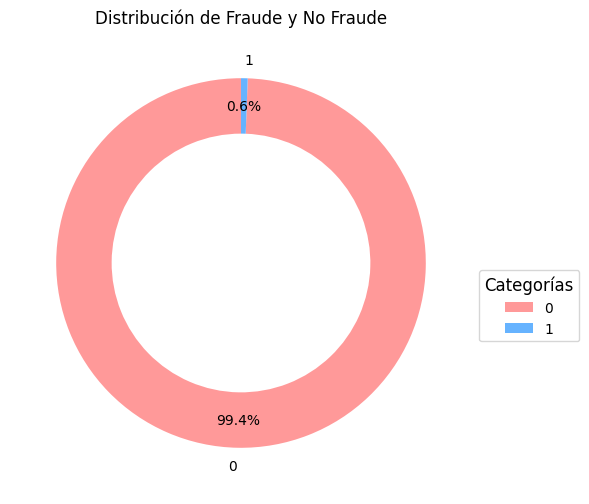

Total de Operaciones: 1296675
   Fraude   Conteo
0       0  1289169
1       1     7506


In [19]:
#Se crea la variable df_fraude y no_fraude

filter_frauds = df.query('is_fraud == 1')
filter_normal = df.query('is_fraud == 0')

# Obtener los conteos de fraude y no fraude
df_fraude_no_fraude = df['is_fraud'].value_counts().reset_index()
df_fraude_no_fraude.columns = ['Fraude', 'Conteo']

# Datos para el gráfico de torta
labels = df_fraude_no_fraude['Fraude']
sizes = df_fraude_no_fraude['Conteo']
colors = ['#ff9999', '#66b3ff']  # Personaliza los colores según lo que prefieras

# Datos para el gráfico de torta
labels = df_fraude_no_fraude['Fraude']
sizes = df_fraude_no_fraude['Conteo']
colors = ['#ff9999', '#66b3ff']  # Personaliza los colores según lo que prefieras

# Crear gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, wedgeprops={'width': 0.3})
# Configurar el aspecto del gráfico para que sea un círculo
plt.gca().set_aspect('equal')

# Agregar leyenda
plt.legend(labels=labels, loc="best", fontsize='medium', title="Categorías", title_fontsize='large', bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.title('Distribución de Fraude y No Fraude')
plt.show()
print(f'Total de Operaciones: {len(df)}\n{df_fraude_no_fraude}')

---

### 1. Distribución de Compras y Fraudes por Ciudades

In [20]:
# Obtener los 10 ciudades con mayor número de ocurrencias
primeros_10_ciudades = df['city'].value_counts().head(10)

# Reiniciar el índice para que los nombres de las ciudades estén en una columna y sus conteos en otra
primeros_10_ciudades = primeros_10_ciudades.reset_index()

# Renombrar las columnas: 'index' (que contenía las ciudades) ahora será 'ciudades',
# y la columna con los conteos será 'conteo'
primeros_10_ciudades.columns = ['ciudades', 'conteo']

ciudades_operaciones_10 = graficas_barras (primeros_10_ciudades, 'ciudades', 'conteo', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', 
                                                              '#ea96b9', '#ef9997', '#faa67b', '#efb99e', '#fa915c',
                                                              '#bb7497', '#549fa3', '#547ca3', '#3776dc'],
                 'Top 10 Ciudades con más Operaciones', 'Ciudades', 'Conteo', 'v')

In [21]:
# Agrupar y contar las categorías por ciudad
normal_lugar = filter_normal.groupby(['city', 'category'])['category'].count().reset_index(name='count')

#Se traen las cinco ciudades que más consumen por categoría
top_cinco_ciudades = (normal_lugar
                      .sort_values(by=['category', 'count'], ascending=[True, False])  # Ordenar por categoría y luego por conteo
                      .groupby('category')  # Agrupar por categoría
                      .head(10)  # Tomar las 5 primeras filas de cada grupo
                     )
#Se crea una variable para cada categioría que muestre las cinco ciudades principales por consumo
ciudades_entertainment = top_cinco_ciudades.query('category == "entertainment"')
ciudades_food = top_cinco_ciudades.query('category == "food dining"')
ciudades_gas = top_cinco_ciudades.query('category == "gas transport"')
ciudades_grocery_net = top_cinco_ciudades.query('category == "grocery net"')
ciudades_grocery_pos = top_cinco_ciudades.query('category == "grocery pos"')
ciudades_health_fitness = top_cinco_ciudades.query('category == "health fitness"')
ciudades_home = top_cinco_ciudades.query('category == "home"')
ciudades_kids = top_cinco_ciudades.query('category == "kids pets"')
ciudades_misc_net = top_cinco_ciudades.query('category == "misc net"')
ciudades_misc_pos = top_cinco_ciudades.query('category == "misc pos"')
ciudades_personal = top_cinco_ciudades.query('category == "personal care"')
ciudades_shopping_net = top_cinco_ciudades.query('category == "shopping net"')
ciudades_shopping_pos = top_cinco_ciudades.query('category == "shopping pos"')
ciudades_travel = top_cinco_ciudades.query('category == "travel"')

#Se crean las gráficas para cada variable
travel = graficas_barras(ciudades_travel, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Travel', 'Cantidad', 'Ciudades', 'v')

entertainment = graficas_barras(ciudades_entertainment, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Entertainment', 'Cantidad', 'Ciudades', 'v')

food = graficas_barras(ciudades_food, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Food Dining', 'Cantidad', 'Ciudades', 'v')

gas = graficas_barras(ciudades_gas, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Gas Transport', 'Cantidad', 'Ciudades', 'v')

grocery_net = graficas_barras(ciudades_grocery_net, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Grocery Net', 'Cantidad', 'Ciudades', 'v')

grocery_pos = graficas_barras(ciudades_grocery_pos, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Grocery Pos', 'Cantidad', 'Ciudades', 'v')

health_fitness = graficas_barras(ciudades_health_fitness, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Health Fitness', 'Cantidad', 'Ciudades', 'v')

home = graficas_barras(ciudades_home, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Home', 'Cantidad', 'Ciudades', 'v')

kids = graficas_barras(ciudades_kids, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Kids', 'Cantidad', 'Ciudades', 'v')

misc_net = graficas_barras(ciudades_misc_net, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Misc Net', 'Cantidad', 'Ciudades', 'v')

misc_pos = graficas_barras(ciudades_misc_pos, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Misc Pos', 'Cantidad', 'Ciudades', 'v')

personal = graficas_barras(ciudades_personal, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Personal Care', 'Cantidad', 'Ciudades', 'v')

shopping_net = graficas_barras(ciudades_shopping_net, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Shopping Net', 'Cantidad', 'Ciudades', 'v')

shopping_pos = graficas_barras(ciudades_shopping_pos, 'city', 'count', 
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                       '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'], 
                'Ciudades con Mayor Consumo para Shopping Pos', 'Cantidad', 'Ciudades', 'v')

In [22]:
# Obtener las ciudades con más transacciones fraudulentas
primeros_10_ciudades_fraude = filter_frauds['city'].value_counts().head(10)

# Reiniciar el índice para que los nombres de las ciudades estén en una columna y sus conteos en otra
primeros_10_ciudades_fraude = primeros_10_ciudades_fraude.reset_index()

# Renombrar las columnas: 'index' (que contenía las ciudades) ahora será 'ciudades',
# y la columna con los conteos será 'conteo'
primeros_10_ciudades_fraude.columns = ['ciudades', 'conteo']

ciudades_fraudes_10 = graficas_barras (primeros_10_ciudades_fraude, 'ciudades', 'conteo', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 
                 'Top 10 Ciudades con más Fraudes', 'ciudades', 'conteo', 'v')

### 2. Estados

In [23]:
# Obtener los 10 estados con mayor número de ocurrencias
primeros_10_estados = df['state'].value_counts().head(10).reset_index()

# Renombrar las columnas: 'index' (que contenía los estados) ahora será 'estados',
# y la columna con los conteos será 'conteo'
primeros_10_estados.columns = ['estados', 'conteo']

#Graficar
estados_consumo_10 = graficas_barras (primeros_10_estados, 'estados', 'conteo', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Top 10 Estados con más Operaciones', 
                 'estados', 'conteo', 'v')

In [24]:
# Obtener los estados con más transacciones fraudulentas
primeros_10_estados_fraude = filter_frauds['state'].value_counts().head(10).reset_index()

# Renombrar las columnas: 'index' (que contenía los estados) ahora será 'estados',
# y la columna con los conteos será 'conteo'
primeros_10_estados_fraude.columns = ['state', 'conteo']

estados_fraudes_10 = graficas_barras (primeros_10_estados_fraude, 'state', 'conteo', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Top 10 Estados con más Fraudes', 
                 'estados', 'conteo', 'v')

## 3. Categoría de Comercios

In [25]:
# Obtener las 14 categorías con mayor número de ocurrencias
primeros_10_categorias = df['category'].value_counts().head(14).reset_index()

# Renombrar las columnas: 'index' (que contenía las categorías) ahora será 'categorias',
# y la columna con los conteos será 'conteo'
primeros_10_categorias.columns = ['categorias', 'conteo']

Operaciones_categoria = graficas_barras (primeros_10_categorias, 'categorias', 'conteo', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Categorías con más Operaciones', 
                 'categorias', 'conteo', 'v')

In [26]:
# Obtener las categorías con más transacciones fraudulentas
primeros_10_categorias_fraude = filter_frauds['category'].value_counts()

# Reiniciar el índice para que los nombres de las categorías estén en una columna y sus conteos en otra
primeros_10_categorias_fraude = primeros_10_categorias_fraude.reset_index()

# Renombrar las columnas: 'index' (que contenía las categorías) ahora será 'categorias',
# y la columna con los conteos será 'conteo'
primeros_10_categorias_fraude.columns = ['categorias', 'conteo']

categorias_Fraudes = graficas_barras (primeros_10_categorias_fraude, 'categorias', 'conteo', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Categorías con más Fraudes', 
                 'categorias', 'conteo', 'v')

In [27]:
#Se cuentan los fraudes por categoría
fraude_categoría = filter_frauds.groupby('category')['is_fraud'].count().reset_index().sort_values(by = 'is_fraud', ascending=False)

#Se calcula la tasa de fraude por categoría
total_events_by_category = df.groupby('category').size().reset_index(name='total_events')
merged_rate = pd.merge(fraude_categoría, total_events_by_category, on='category')
merged_rate['rate'] = (merged_rate['is_fraud'] / merged_rate['total_events'] * 100).round(2)
merged_rate = merged_rate.sort_values(by='rate', ascending=False)

#Se grafica la tasa de fraudes por Categoría
tasa_fraudes_categoria = graficas_barras(merged_rate, 'rate', 'category',
                ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997',
                 '#faa67b', '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'],
                'Tasa de Fraudes por Categoría', 'Tasa', 'Categoría', 'h')

### 4. Fraudes por semestre

In [28]:
# Se agrupan las fechas en trimestres para el análisis.
filter_frauds.loc[:, 'trimester'] = filter_frauds['trans_date_trans_time'].dt.quarter

# Calcular el número de fraudes por trimestre.
fraud_per_trimestre = filter_frauds['trimester'].value_counts().reset_index()

# Convertir la columna 'trimester' a string si es necesario para futuros análisis o visualizaciones.
fraud_per_trimestre['trimester'] = fraud_per_trimestre['trimester'].astype(str)
trimestre_1_2 = fraud_per_trimestre[fraud_per_trimestre['trimester'].isin(['1', '2'])]
fraud_trimestre_graph = graficas_barras (trimestre_1_2, 'trimester', 'count', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Número de Fraudes por Trimestre', 
                 'trimestre', 'conteo', 'v')

C:\Users\Natalia Lopera\AppData\Local\Temp\ipykernel_28560\542178186.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
# Calcular los montos totales de fraudes por estado
fraude_por_estado_monto = filter_frauds.groupby('state')['amt'].sum().reset_index()

# Combinar las dos informaciones en un solo DataFrame
fraudes_estados_gral = filter_frauds['state'].value_counts().reset_index()
fraude_estado_info = pd.merge(fraudes_estados_gral, fraude_por_estado_monto, on='state').head(10)

fraude_estado_graph = graficas_barras (fraude_estado_info, 'state', 'count', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Top 10 Estados con Más Fraude y Montos Totales', 
                 'state', 'conteo', 'v')

## 3. Distribución de Género

In [30]:
# Agrupar por género y categoría, contando las ocurrencias
normal_genero = filter_normal.groupby(['gender', 'category'])['category'].count().reset_index(name='count')

# Ordenar el DataFrame por género y luego por conteo
normal_genero = normal_genero.sort_values(by=['gender', 'count'], ascending=[True, False])

# Se hace una tabla pivote para obtener una columna por género ('F' y 'M') con sus respectivos conteos
normal_genero_pivot = normal_genero.pivot_table(index='category', columns='gender', values='count', fill_value=0).reset_index()
top_category_gender = normal_genero_pivot.head(5)
less_category_gender = normal_genero_pivot.tail(5)

#Top 10 states
top_10_states = filter_frauds['state'].value_counts().head(10).index

# Filtrar el DataFrame para incluir solo las filas de las 10 ciudades con más fraudes
ciudad_fraude = filter_frauds[filter_frauds['state'].isin(top_10_states)]

# Agrupar por 'gender' y 'city', y contar el número de fraudes
ciudad_genero = ciudad_fraude.groupby(['gender', 'state'])['state'].size().reset_index(name='count')
ciudad_genero_pivot = ciudad_genero.pivot_table(index='state', columns='gender', values='count', fill_value=0).reset_index()


#Se gráfican las variables relacionadas al género
normal_genero_graph = graficas_barras_apiladas (normal_genero_pivot, 'femenine', 'masculine', 'category', 'F', 'M', 
                          'Distribución de Consumo por Género y Categoría', 'Categoría', 'Cantindad')

less_gender = graficas_barras_apiladas (less_category_gender, 'femenine', 'masculine', 'category', 'F', 'M', 
                          'Top 5 de Categorías Menos Consumidas por Género', 'Categoría', 'Cantindad')

top_gender = graficas_barras_apiladas(top_category_gender, 'femenine', 'masculine', 'category', 'F', 'M', 
                          'Top 5 de Categorías Más Consumidas por Género', 'Categoría', 'Cantindad')

ciudad_genero_graph = graficas_barras_apiladas(ciudad_genero_pivot, 'femenino', 'masculino', 'state', 'F', 'M',
                         'Distribución de Fraudes por Género y Estado', 'Estado', 'Cantidad')

---

## 4. Distribución Rango Etario

In [31]:
# Contar el número de fraudes por rango etario
fraude_por_rango_etario = filter_frauds['age_classification'].value_counts().reset_index(name= 'fraudes')

# Calcular los montos totales de fraudes por rango etario
fraude_por_rango_etario_monto = filter_frauds.groupby('age_classification', observed=False)['amt'].sum().reset_index()

#Se cuenta el numero de no fraudes por edad
consumo_por_rango_etario = filter_normal['age_classification'].value_counts().reset_index(name='no fraudes')

# Combinar las dos informaciones en un solo DataFrame
fraude_rango_etario_info = pd.merge(fraude_por_rango_etario, fraude_por_rango_etario_monto, on='age_classification').merge(consumo_por_rango_etario, on= 'age_classification')

#Se agrega esta información al dataframe consumo_por_rango_etario

fraude_rango_etario_info['tasa_monto'] = fraude_rango_etario_info['amt']/fraude_rango_etario_info['amt'].sum()*100
fraude_rango_etario_info['tasa_fraudes'] = fraude_rango_etario_info['fraudes']/fraude_rango_etario_info['fraudes'].sum()*100
fraude_rango_etario_info['tasa_fraude_consumo'] = fraude_rango_etario_info['fraudes']/fraude_rango_etario_info['no fraudes']*100

# Contar fraudes por rango etario y género
fraude_por_rango_etario_genero = filter_frauds.groupby(['age_classification', 'gender'], observed=False).size().reset_index(name='count')
fraude_genero_pivot = fraude_por_rango_etario_genero.pivot_table(index='age_classification', columns='gender', values='count', fill_value=0).reset_index()

#Se crea el df normal_age que asoacia la categoría de consumo y la edad
normal_age = filter_normal.groupby(['age_classification', 'category'], observed=False)['category'].count().reset_index(name='count')

#Aquí se establecen las 5 categorías más comunes
top_5_categories = ['entertainment', 'food dining', 'gas transport', 'grocery net', 'grocery pos']

#Se establecen las categorías menos comunes
top_less_categories = ['misc pos', 'personal care', 'shopping net', 'shopping pos', 'travel'] 

#Se filtra la relación edad y categoría, por las categorías más consumidas
most_consumpted_age = normal_age[normal_age['category'].isin(top_5_categories)]

C:\Users\Natalia Lopera\AppData\Local\Temp\ipykernel_28560\1289380582.py:21: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



In [32]:
#Graficas
tasa_fraudes_edad = graficas_barras (fraude_rango_etario_info, 'age_classification', 'tasa_fraudes', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Tasa de Fraudes por Grupo Etario', 
                 'Grupo Etario', 'Tasa', 'v')

dinero_perdido_edad = graficas_barras (fraude_rango_etario_info, 'age_classification', 'amt', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 
                 'Cifras Monetarias Totales Perdidas por Fraudes según Grupo Etario', 
                 'grupo etario', 'fraudes', 'v')

fraudes_consumo_edad = graficas_barras (fraude_rango_etario_info, 'age_classification', 'tasa_fraude_consumo', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 
                 'Tasa de Fraude Según los Niveles de Consumo de Cada Grupo Etario', 
                 'grupo etario', 'fraudes', 'v')

genero_edad = graficas_barras_apiladas(fraude_genero_pivot, 'femenino', 'masculino', 'age_classification', 'F', 'M', 
                         'Distribución de Fraudes por Género y Grupo Etario', 'Grupo Etario', 'Cantidad')



In [33]:
consumpted_age_pivot = most_consumpted_age.pivot(index='age_classification', columns='category', values='count').fillna(0)
consumpted_age_pivot = consumpted_age_pivot.reset_index()

age_category_fraud = graficas_barras_agrupadas (consumpted_age_pivot,'entertainment', 'food dining', 'gas transport', 'grocery net', 'grocery pos', 
                                          'age_classification', 'entertainment', 'food dining', 'gas transport', 
                                          'grocery net', 'grocery pos', 'Distribución de Fraudes por Género y Grupo Etario',
                                          'Grupo Etario', 'Cantidad')

---

## Merchant(Comercios):

In [34]:
# Contar transacciones por comercio
transacciones_por_comercio = df['merchant'].value_counts().reset_index()

# Renombrar las columnas
transacciones_por_comercio.columns = ['merchant', 'num_transacciones']

#Se hace el conteo de fraudes por comercio
fraudes_por_comercio = df[df['is_fraud'] == 1]['merchant'].value_counts().reset_index(name= 'num_fraudes')

# Unir transacciones y fraudes por comercio
comparacion_fraudes = pd.merge(
    transacciones_por_comercio, 
    fraudes_por_comercio, 
    on='merchant', 
    how='left'
).fillna(0) 

# Calcular el porcentaje de fraudes
comparacion_fraudes['porcentaje_fraude'] = (comparacion_fraudes['num_fraudes'] / comparacion_fraudes['num_transacciones']) * 100

# Visualizar los resultados
top_comercios = comparacion_fraudes.sort_values(by='porcentaje_fraude', ascending=False).head(10)

In [35]:
tasa_fraudes_comercios = graficas_barras (top_comercios, 'porcentaje_fraude', 'merchant', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 
                 'Tasa de Fraudes por los 10 Comercios con Mayor Número', 
                 'grupo etario', 'fraudes', 'h')

---

## JOSE

In [36]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = (np.sin(dlat / 2) ** 2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

In [37]:
#Calcula cantidad de transacciones múltiples
dupli_ccnum = df[df["cc_num"].duplicated()]
print(f"Esta es la cantidad total de transacciones múltiples por tarjeta de crédito: {dupli_ccnum['cc_num'].count()}")

Esta es la cantidad total de transacciones múltiples por tarjeta de crédito: 1295692


In [38]:
#Se crea una tavbla pivote que almacena la cantidad de transacciones totales, así como la suma total en dinero
# para cada usuario 

pivot_dupli = dupli_ccnum.pivot_table(values=['trans_num', 'amt'], index='cc_num', aggfunc={'trans_num': 'count', 'amt': 'sum'}).sort_values(by='trans_num')
pivot_dupli.rename(columns={
    'trans_num': 'Cantidad de Usos',
    'amt': 'Suma Total de Transacciones'
}, inplace=True)

pivot_dupli.sort_values(by='Suma Total de Transacciones', ascending=False, inplace=True)
display(pivot_dupli.head(10))

display(pivot_dupli.describe())

,Suma Total de Transacciones,Cantidad de Usos
cc_num,,
6011367958204270,"296,353.63",3109
4908846471916297,"290,464.36",3038
6011438889172900,"283,827.52",3105
36722699017270,"280,005.33",3118
6011893664860915,"278,107.26",3089
3583635130604947,"277,986.64",3025
6011109736646996,"277,944.29",3100
2712209726293386,"277,060.07",3063
372509258176510,"275,830.79",3053


,Suma Total de Transacciones,Cantidad de Usos
count,983.00,983.00
mean,"92,707.06","1,318.10"
std,"59,614.32",812.24
min,"1,038.43",6.00
25%,"43,319.81",524.00
50%,"88,475.41","1,053.00"
75%,"126,779.79","2,024.00"
max,"296,353.63","3,122.00"


A continuación, se presenta la información relevante extraída del método .describe() en el DataFrame pivot_dupli:

* **Columna cantidad de usos**:
    * El promedio de transacciones por tarjeta es aproximadamente 1,318.01, lo que sugiere un uso frecuente de las tarjetas.
    * La desviación estándar es notablemente alta (62% de la media), lo que indica que algunas tarjetas tienen un número de transacciones significativamente mayor que otras.
    * La tarjeta con el menor número de transacciones fue utilizada 6 veces, mientras que la de mayor uso lo fue 3,122 veces. Esto sugiere que existen usuarios muy activos con sus tarjetas.

* **Columna suma total de transacciones**:
    * El monto promedio de las transacciones es de 92,707.06, lo que indica un uso relativamente alto de las tarjetas en comparación con las transacciones diarias típicas.
    * La desviación estándar también es alta (64% de la media), lo que sugiere una gran variabilidad en los montos, con algunas transacciones significativamente más altas que otras.
    * El monto mínimo de una transacción es de 1,038.43, lo que indica la existencia de transacciones de menor valor, mientras que el monto máximo es de 296,353.63, lo que puede ser indicativo de transacciones inusualmente grandes y potencialmente fraudulentas.

    **La amplia diferencia entre el número mínimo y máximo de transacciones, así como entre los montos mínimos y máximos, resalta la necesidad de realizar un análisis exhaustivo para detectar posibles fraudes. La alta desviación estándar en ambas columnas sugiere la presencia de comportamientos atípicos en el uso de tarjetas de crédito, lo que facilitará el proceso de análisis de fraudes..**

### Matriz de correlación 

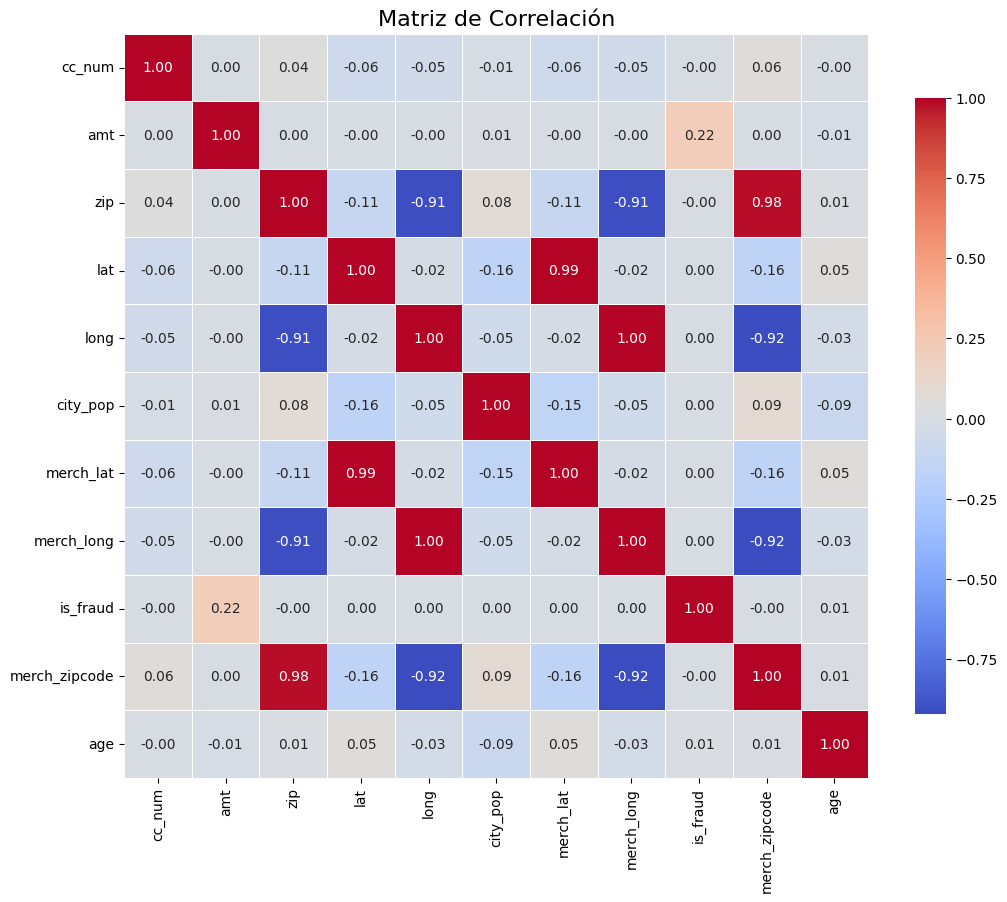

In [39]:
#Se grafica una matriz de correlación para observar la relación entre las variables
numeric_columns = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación', fontsize=16)
plt.show()

* **Relación entre is_fraud y las variables geográficas (zip, lat, long, merch_lat, merch_zipcode):** Las correlaciones extremadamente bajas (cercanas a 0) indican que la ubicación geográfica (tanto del comprador como del comerciante) no parece tener un impacto significativo en si una transacción es fraudulenta. Este hallazgo sugiere que los fraudes no están concentrados en zonas geográficas específicas.

* **Relación entre amt y is_fraud:** Hay una correlación relativamente alta entre el monto de la transacción (amt) y is_fraud, lo que indica que las transacciones de mayor monto tienen más probabilidad de ser fraudulentas. Esto sugiere que el monto es un factor relevante para detectar fraude.

* **Relación entre Unnamed: 0 y unix_time:** Existe una correlación casi perfecta entre Unnamed: 0 y unix_time. Esto sugiere que Unnamed: 0 es simplemente un índice basado en el tiempo o el orden de las transacciones, lo que lo hace redundante. Podría eliminarse en el análisis.

* **Relación entre zip y merch_zipcode:** La alta correlación entre zip y merch_zipcode indica que muchas transacciones ocurren entre compradores y comerciantes que están geográficamente cercanos. Dado que esta información es redundante, puedes eliminar una de las dos columnas. Preferiblemente, eliminar merch_zipcode, ya que tienes la columna merchant que contiene el nombre del comercio y es más relevante.


**En conclusión:**
* **La variable is_fraud está más correlacionada con el monto de la transacción (amt) que con cualquier otra variable, lo que sugiere que las transacciones de mayor monto tienen mayor probabilidad de ser fraudulentas.**

* **Las variables geográficas no muestran correlaciones significativas con el fraude, lo que implica que el fraude no está ligado a ubicaciones geográficas específicas.**

* **Existen relaciones fuertes entre las ubicaciones de los compradores y comerciantes, lo que indica que las transacciones tienden a ocurrir en áreas geográficamente cercanas.**

* **Es recomendable eliminar columnas con alta correlación (como Unnamed: 0 y merch_zipcode) por su naturaleza redundante, lo que permitirá enfocarse en las variables más relevantes para la predicción de fraude. Además, eliminando las columnas first y last probablamente no son útiles para identificar si una transacción es fraudulenta o no, esta no suele tener un impacto significativo en los patrones de fraude, porque el fraude no está relacionado con el nomnbre del cliente, sino con comportamiento anómalos, montos, numero de transacciones y ubicaciones**

In [40]:
#Se crean nuevas variables dada la falta de correlación entre las variables originales
data_copy = df.copy()

# Se crea columna distancia entre el cliente y comercio
data_copy['distance'] = data_copy.apply(lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']), axis=1)

# Se crea columna monto promedio por transacción
data_copy['amount_per_transaction'] = data_copy.groupby('cc_num')['amt'].transform('mean')

# Se crea columna relación entre el monto y la edad del titular
data_copy['amount_per_age'] = data_copy['amt'] / data_copy['age']

# Se crea columna días desde la última transacción
data_copy['trans_date_trans_time'] = pd.to_datetime(data_copy['trans_date_trans_time'])
data_copy['days_since_last_transaction'] = data_copy.groupby('cc_num')['trans_date_trans_time'].diff().dt.days.fillna(0)

# Se crea columna monto total gastado por tarjeta
data_copy['total_spent'] = data_copy.groupby('cc_num')['amt'].transform('sum')

# Se crea columna diferencia de monto respecto al promedio
data_copy['amount_diff'] = data_copy['amt'] - data_copy.groupby('cc_num')['amt'].transform('mean')

# Se crea columna frecuencia de uso
data_copy['transaction_count'] = data_copy.groupby('cc_num')['cc_num'].transform('count')

# Se crea columna relacion entre el monto y la frecuencia de uso
data_copy['amount_frequency_ratio'] = data_copy['amount_per_transaction'] / data_copy['transaction_count']

# Se crea columna diferencia de tiempo entre transacciones
data_copy['time_diff'] = data_copy.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)

# Se crea columna interacción entre la edad y el monto
data_copy['age_amount_interaction'] = data_copy['age'] * data_copy['amt']

# Se crea columna frecuencia de transacciones por cliente
transaction_counts = data_copy['cc_num'].value_counts()
data_copy['transaction_count'] = data_copy['cc_num'].map(transaction_counts)

# Se crea columna frecuencia de transacciones por comercio
merchant_counts = data_copy['merchant'].value_counts()
data_copy['transaction_count_by_merchant'] = data_copy['merchant'].map(merchant_counts)

# Se crea columna para saber cuantas categorias tiene el comercio
unique_category_counts = data_copy.groupby('merchant')['category'].nunique()
data_copy['nunique_category'] = data_copy['merchant'].map(unique_category_counts)



In [41]:
#Se crea la variable frequent_amounts que agrupa el valor monetario de fraudes y la frecuencia, arrojando el valor monetario total
frequent_amounts = data_copy['amt'].value_counts().reset_index()
frequent_amounts.columns = ['amount', 'frequency']
frequent_amounts = frequent_amounts.sort_values(by='frequency', ascending=False)
bins = [0, 100, 500, 1000, 5000, 10000, 30000] 
labels = ['0-100', '101-500', '501-1000', '1001-5000', '5001-10000', '10001-30000']
frequent_amounts['amount_range'] = pd.cut(frequent_amounts['amount'], bins=bins, labels=labels, right=False)
grouped_data = frequent_amounts.groupby('amount_range', observed=False)['frequency'].sum().reset_index()

#Se grafica el valor monetario total de acuerdo a la frecuencia de fraudes
amount_frequency_graph = graficas_barras (grouped_data, 'amount_range', 'frequency', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Frecuencia de Montos por Rango', 
                 'Rango de Monto', 'Frecuencia', 'v')

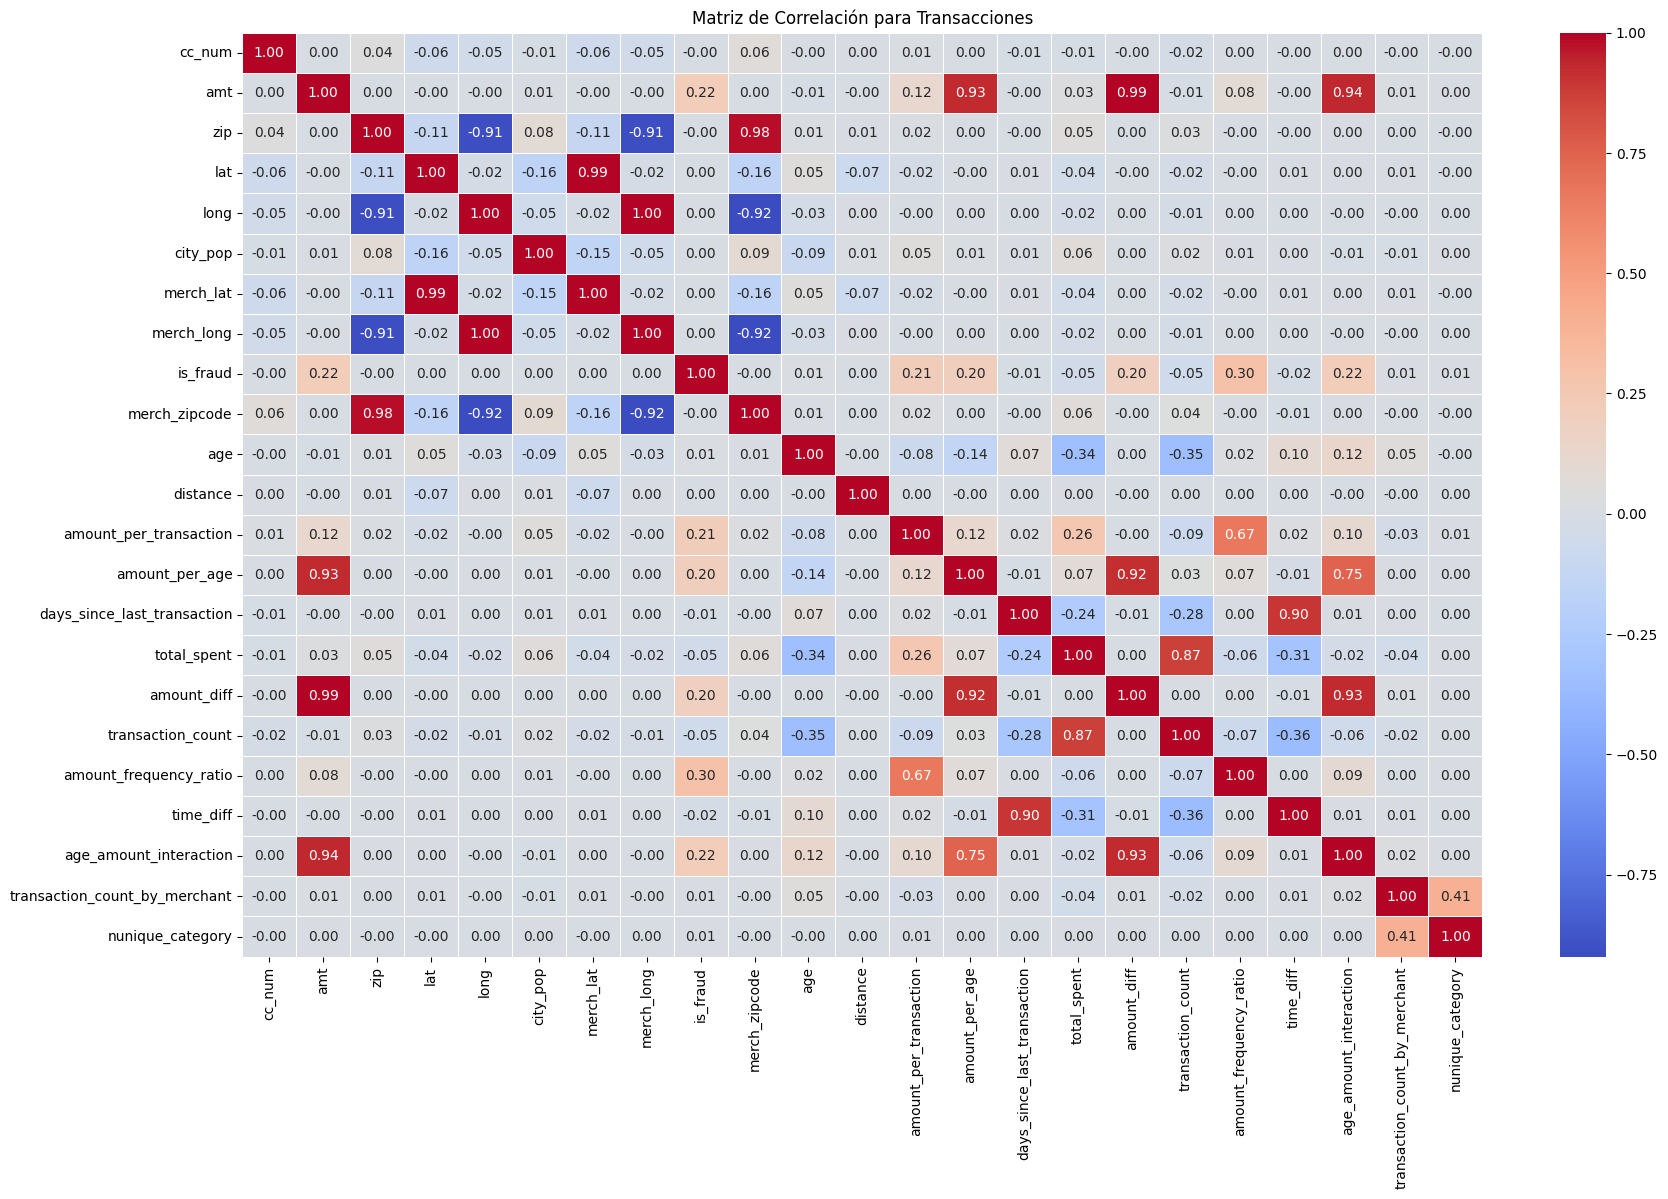

In [42]:
#Se genera un gráfico de correlación entre las variables nuevas
numeric_columns = data_copy.select_dtypes(include='number')

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación para Transacciones')
plt.show()

## Segmentación tiempo

In [43]:
#Segmentación por día de la semana
data_copy['day_of_week'] = data_copy['trans_date_trans_time'].dt.day_name()

weekly_count = data_copy.groupby('day_of_week').size()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_count = weekly_count.reindex(days_order, fill_value=0).reset_index()
weekly_count.columns=['day_of_week', 'count']

weekly_count_graph = graficas_barras (weekly_count, 'day_of_week', 'count', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Conteo de Transacciones por Día de la Semana', 
                 'día de la Semana', 'Cantidad', 'v')



In [44]:
#Segmentación por mes
monthly_count = data_copy.groupby(data_copy['trans_date_trans_time'].dt.month).size().reset_index()
monthly_count.columns = ['Mes', 'Numero de Transacciones']

#Se grafica el número de fraudes por mes
monthly_count_graph = graficas_barras (monthly_count, 'Mes', 'Numero de Transacciones', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Conteo de Transacciones por Mes', 
                 'Mes', 'Cantidad', 'v')


In [45]:
#Segmentación de tiempo trimestral

quarterly_count = data_copy.groupby(data_copy['trans_date_trans_time'].dt.to_period('Q')).size().reset_index(name='count')
quarterly_count['Trimestre'] = quarterly_count['trans_date_trans_time'].dt.strftime('%Y-Q%q')
quarterly_count = quarterly_count[['Trimestre', 'count']]
quarterly_count.columns = ['Trimestre', 'Numero de Transacciones']
quarterly_count

#Se grafica la distribución de fraudes por trimestre 
quarterly_count_graph = graficas_barras (quarterly_count, 'Trimestre', 'Numero de Transacciones', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Conteo de Transacciones por Trimestre', 
                 'Trimestre', 'Cantidad', 'v')

## Distribución de la variable job

In [46]:
#Se crea la variable fraud_counts_job para almacenar el numero de fraudes por tipo de trabajo
fraud_counts_job = filter_frauds['job'].value_counts().reset_index()
fraud_counts_job.columns = ['job', 'fraud_count']

#Se hace una agrupación para clasificar los fraudes en rangos por tipo de trabajo
bins = [0, 10, 20, 30, 40, 50, 60, fraud_counts_job['fraud_count'].max() + 1]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']
fraud_counts_job['range'] = pd.cut(fraud_counts_job['fraud_count'], bins=bins, labels=labels, right=False)
fraud_counts_job['group'] = fraud_counts_job['range'].cat.codes + 1
table = fraud_counts_job[['group', 'job', 'fraud_count']]
grouped_sums = fraud_counts_job.groupby('group')['fraud_count'].sum().reset_index()
grouped_sums.columns = ['group', 'total_fraud_count']
table = table.merge(grouped_sums, on='group', how='left')
final_table = table.loc[table.groupby('group')['fraud_count'].idxmax()]

#Se grafica la distribución de fraudes por tipo de trabajo
count_jobs = graficas_barras (final_table, 'group', 'fraud_count', ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', 
                                                                     '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
                                                                     '#efb99e', '#fa915c', '#bb7497', '#549fa3', 
                                                                     '#547ca3', '#3776dc'], 'Numero de Fraudes por Grupo de Profesion', 
                 'Grupo', 'Cantidad de Fraudes', 'v')

In [47]:
#Se crea un filtro para los grupos que contienen ciertos trabajos
filtered_groups_1 = [4, 5, 6, 7]
filtered_table_1 = table[table['group'].isin(filtered_groups_1)]

# Diccionario para almacenar las gráficas por grupo
graficas_por_grupo_1 = {}

for group in filtered_groups_1:
    # Filtramos los datos para el grupo específico
    group_data = filtered_table_1[filtered_table_1['group'] == group]
    
    # Almacenamos cada gráfica en el diccionario, usando el grupo como clave
    graficas_por_grupo_1[group] = graficas_barras(
        group_data,                        # Datos específicos del grupo
        'job',                             # Columna del eje X (profesión)
        'fraud_count',                     # Columna del eje Y (cantidad de fraudes)
        ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
         '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc', '#53357e', '#9264a8', 
         '#947fae', '#b0a0bb', '#ccb5ca', '#e88cbd', '#e07ab2', '#f4c6b2', '#fbbb91', '#d3868c'],  
        f'Numero de Fraudes por Profesion en el Grupo {group}', 
        'Profesión',                       
        'Cantidad de Fraudes',             
        'v'                               
    )


In [48]:
#Se crea un filtro para otro grupo de profesiones
filtered_groups_2 = [1, 2, 3]
filtered_table_2 = table[table['group'].isin(filtered_groups_2)]

# Diccionario para almacenar las gráficas por grupo
graficas_por_grupo_2 = {}

for group in filtered_groups_2:
    # Filtramos los datos para el grupo específico
    group_data = filtered_table_2[filtered_table_2['group'] == group]
    
    # Almacenamos cada gráfica en el diccionario, usando el grupo como clave
    graficas_por_grupo_2[group] = graficas_barras(
        group_data,                        # Datos específicos del grupo
        'job',                             # Columna del eje X (profesión)
        'fraud_count',                     # Columna del eje Y (cantidad de fraudes)
        ['#5b3e80', '#9b6ba9', '#9977b6', '#b4a6bf', '#d1aebf', '#ea96b9', '#ef9997', '#faa67b', 
         '#efb99e', '#fa915c', '#bb7497', '#549fa3', '#547ca3', '#3776dc'],  # Colores
        f'Numero de Fraudes por Profesion en el Grupo {group}',  # Título
        'Profesión',                       # Etiqueta del eje X
        'Cantidad de Fraudes',             # Etiqueta del eje Y
        'v'                                # Orientación vertical de la gráfica
    )

In [56]:
#Se exporta el dataset modificado
data_copy.to_csv('data_copy.csv', index=False)


## **Gráficas y Análisis**

In [49]:
#Gráficas Estados y Ciudades
ciudades_operaciones_10.show()
grocery_pos.show()
misc_net.show()
shopping_net.show()
ciudades_fraudes_10.show()
estados_consumo_10.show()
estados_fraudes_10.show()
fraude_estado_graph.show()

#### **Observaciones:**
1. **Alta concentración en ciudades con mayor fraude**:  
   Las ciudades con más registros de fraude tienden a estar en el mismo rango que las que tienen un mayor número de transacciones. **Houston** es la ciudad con más fraudes, con **39 registros de fraude**, lo que la convierte en una zona crítica a analizar. Otras ciudades destacadas son **Warren** y **Huntsville**, con un número notable de transacciones fraudulentas.

2. **Frecuencia de fraude por ciudad**:  
   Un número elevado de ciudades presenta fraude, lo que sugiere que el fraude no está concentrado solo en unas pocas ubicaciones, sino que es un problema extendido. Sin embargo, el hecho de que algunas ciudades como **Houston** y **Warren** lideren las estadísticas, sugiere que en estos lugares el fraude podría estar más relacionado con ciertos factores específicos (como actividad económica o sector comercial).

3. **Potenciales áreas de intervención**:  
   Las ciudades con altos niveles de fraude, como **Houston, Warren, y Huntsville**, deben ser consideradas como áreas prioritarias para una investigación más detallada. Se podrían aplicar técnicas de análisis adicionales, como la detección de patrones de fraude, para entender mejor la naturaleza del problema en estas ubicaciones.

4. **Proporción de ciudades sin fraude**:  
   De las **894 ciudades**, solo **702** presentan fraude. Esto indica que una gran parte de las ciudades (alrededor del 21%) no tienen registros de fraude en este conjunto de datos, lo que podría ofrecer insights sobre diferencias en prácticas de seguridad, políticas comerciales o características geográficas.

1. **Top 10 Estados con Más Operaciones**
En el análisis de las operaciones transaccionales, se destacan los siguientes estados como los de mayor actividad:

- **Houston**: Encabeza la lista con un número significativo de operaciones, indicando que es uno de los centros más activos en cuanto a transacciones.
- **Warren, Huntsville, y Naples**: Estos estados también presentan altos volúmenes de transacciones, lo que sugiere que hay una alta concentración de actividades comerciales en estas áreas.
- **Dallas y Tulsa**: Con una cantidad de operaciones notable, estos estados podrían ser importantes en términos de comercio y actividades financieras.



2. **Top 10 Estados con Más Fraudes**
El análisis de los fraudes revela los estados con mayores incidencias en términos de transacciones fraudulentas:

- **Houston**: Aunque lidera en transacciones, también es el estado con la mayor cantidad de fraudes, lo que podría indicar un riesgo elevado en las operaciones de este estado.
- **Warren y Huntsville**: Junto con Houston, son las ubicaciones con los mayores incidentes de fraude.
- **Naples y Dallas**: También presentan una mayor frecuencia de fraudes, sugiriendo que estas áreas podrían estar bajo vigilancia o riesgo en términos de actividades fraudulentas.


---
**Conclusiones**
- **Houston** es el estado con la mayor actividad tanto en operaciones como en fraudes, lo que podría indicar la necesidad de implementar controles más estrictos en las transacciones en esta región.
- Es recomendable realizar un análisis más detallado en **Warren**, **Huntsville**, **Naples**, y **Dallas** para entender mejor los patrones de fraude y posibles áreas de riesgo.
- La diferencia entre los estados con más transacciones y los estados con más fraudes sugiere que el volumen transaccional no siempre correlaciona directamente con el riesgo de fraude. Esto puede ser importante al diseñar estrategias para mitigar fraudes en áreas de alto volumen transaccional.
- Al comparar ambos gráficos, se observa que los estados con mayor número de operaciones no siempre coinciden con los estados con mayor número de fraudes. Sin embargo, estados como **Houston**, **Warren**, y **Huntsville** aparecen en ambos listados, lo que sugiere que estos estados no solo tienen una alta actividad transaccional, sino también un mayor riesgo de fraude.
---

In [50]:
#Gráficas de Distribución Categorias
Operaciones_categoria.show()
categorias_Fraudes.show()
tasa_fraudes_categoria.show()
fraud_trimestre_graph.show()

#### **Observaciones de Categorías de Transacciones y Fraudes:**

 1. **Top Categorías con Más Transacciones**
Las 14 categorías con mayor número de transacciones son las siguientes:

- **Gas_transport**: Con 131,659 transacciones, esta es la categoría con mayor volumen de operaciones. Esto sugiere que los gastos en transporte de gas son muy comunes entre los usuarios.
- **Grocery_pos** y **Home**: Estas categorías también presentan altos volúmenes con 123,638 y 123,115 transacciones respectivamente, lo que refleja una alta actividad en compras de comestibles y productos del hogar.
- **Shopping_pos** y **Kids_pets**: Estas categorías también están entre las más frecuentes, con 116,672 y 113,035 transacciones respectivamente, lo que indica una considerable actividad en compras y productos para niños y mascotas.
- **Shopping_net** y **Entertainment**: Ambas categorías con 97,543 y 94,014 transacciones, muestran un gran volumen de compras en línea y entretenimiento.

 2. **Top Categorías con Más Fraudes**
Las categorías más afectadas por fraudes son las siguientes:

- **Grocery_pos**: Con 1,743 casos de fraude, es la categoría con mayor número de fraudes. Esto sugiere que, a pesar de su alta frecuencia en transacciones legítimas, las compras en esta categoría podrían estar siendo objeto de una cantidad considerable de fraudes.
- **Shopping_net**: Con 1,713 fraudes, esta categoría también destaca como un área de riesgo elevado en términos de actividades fraudulentas en transacciones en línea.
- **Misc_net**: Con 915 fraudes, las transacciones en esta categoría, que probablemente incluyen diversos tipos de servicios en línea, también son susceptibles a fraudes.
- **Shopping_pos**: Con 843 fraudes, es otra categoría con un volumen significativo de fraudes, lo que indica que las compras en puntos de venta pueden ser un foco de actividades fraudulentas.
- **Gas_transport**: A pesar de ser la categoría con más transacciones, también presenta 618 casos de fraude, lo que sugiere que el transporte de gas podría tener ciertas vulnerabilidades.


----
Las categorías grocery pos, shopping net, misc net, shopping pos y gas transport son las categorías en las que mmás registros de fraudes se han presentado. Aunque es importante destacar que estas no son las categorías más populares, a exepción de gas transport y grocery pos. 

Food dining y entertainment: aunque son de los servicios más consumidos, tienen realmente muy bajos indices de fraude, lo cual es bastante destacable. Apenas el 0.25% (233) de los movimientos de la categoría entertainment son fraudes, y en el caso de food dining el 0.17% (151). 

Mientras que en otras categorías como shopping net el 1.76% (1.713) de los movimientos son fraudes, en misc net es el 1.45% (915) y en grocery pos es el 1.41% (1743).

En esa medida, aunque por cifras grocery pos es la categoría de consumo con mayor número de fraudes, shopping net presenta un peor escenario. 

---
**Conclusiones**
- Las categorías con mayor número de transacciones, como **Gas_transport**, **Grocery_pos**, y **Home**, son claves en la vida diaria de los usuarios. Sin embargo, la alta incidencia de fraudes en **Grocery_pos** y **Shopping_net** requiere una atención particular.
- Las categorías más frecuentes como **Gas_transport** y **Grocery_pos** reflejan transacciones cotidianas y necesarias, como el transporte y la compra de alimentos. Esto podría indicar que son áreas clave en la vida financiera de los usuarios.
- Las categorías como **Shopping_pos** y **Entertainment** demuestran que también existe una alta actividad en el comercio de bienes de consumo y ocio.
- Las categorías que combinan un alto volumen de transacciones con un número elevado de fraudes, como **Grocery_pos** y **Shopping_net**, deben ser priorizadas para implementar medidas de prevención y control de fraudes.
- La presencia de **Misc_net** y **Shopping_pos** en la lista de fraudes indica que las transacciones en línea, tanto en servicios diversos como en puntos de venta, son particularmente susceptibles a fraudes.
- **Grocery_pos** y **Shopping_net** lideran tanto en términos de volumen de transacciones como en incidencias de fraude. Esto sugiere que las categorías de productos de consumo diario y compras en línea son especialmente vulnerables a fraudes.
- Aunque **Gas_transport** es una categoría con un alto volumen de transacciones, el hecho de que también aparezca en la lista de categorías con fraude podría indicar que, a pesar de su prevalencia, las medidas de seguridad podrían necesitar revisión.
- Las medidas de prevención de fraude podrían beneficiarse de un enfoque en las transacciones en línea, dado que **Shopping_net** y **Misc_net** están entre las categorías más susceptibles a actividades fraudulentas.
---

In [51]:
#Gráficas Género
normal_genero_graph.show()
less_gender.show()
top_gender.show()
ciudad_genero_graph.show()

### **Observaciones:**

**Distribución de Fraudes por Género**:
   - En todos los estados con los mayores números de fraudes, los hombres tienden a tener una participación ligeramente mayor en comparación con las mujeres. En términos generales, **la cantidad de fraudes masculinos es mayor que la de las mujeres** en casi todos los estados.
   - Ejemplos:
     - En **CA** (California), hay **180 fraudes de hombres** frente a **146 fraudes de mujeres**.
     - En **TX** (Texas), los fraudes masculinos (**242**) superan a los fraudes femeninos (**237**), lo que indica una ligera mayoría de hombres en las actividades fraudulentas.
   - Sin embargo, en algunos estados la diferencia no es tan grande. Por ejemplo, en **AL** (Alabama), la diferencia es mínima, con **112 fraudes femeninos** y **103 fraudes masculinos**.

 **Estados con los Mayor Número de Fraudes**:
   - **NY (New York)** es el estado con el mayor número de fraudes, con un total de **555 fraudes**, de los cuales **288 son de mujeres** y **267 de hombres**.
   - **TX (Texas)** sigue en segundo lugar con **479 fraudes**, distribuidos entre **237 mujeres** y **242 hombres**.
   - **PA (Pennsylvania)**, con **458 fraudes**, tiene una distribución más equilibrada entre géneros, con **238 fraudes femeninos** y **220 fraudes masculinos**.

. **Monto Total de Fraudes por Estado**:
   - La cantidad de fraudes no siempre está directamente relacionada con los montos totales de fraude. Los estados con más fraudes no siempre tienen los montos más altos.
   - Sin embargo, los estados con más fraudes tienden a estar en la parte superior en cuanto a montos. Esto podría indicar que la frecuencia de fraudes en estos estados es considerablemente alta, lo que podría ser un área clave de enfoque para las estrategias de prevención de fraude.

### **Conclusiones:**

**Predomina el Fraude Masculino**:
   - En general, el fraude parece ser más común entre los hombres en la mayoría de los estados. Esto se observa claramente en estados como **CA**, **TX**, y **MI**, donde los hombres tienen una mayor participación en las actividades fraudulentas.
   
**Estados con Mayor Frecuencia de Fraudes**:
   - Los estados con el mayor número de fraudes incluyen **NY**, **TX**, y **PA**. Estos estados también presentan un volumen considerable de fraudes por género, lo que indica que podrían ser focos clave de atención para la prevención de fraudes.
   
**Diferencia Menor en Alabama**:
   - En **AL**, la diferencia entre fraudes masculinos y femeninos es muy pequeña. Esto sugiere que, en este estado en particular, las estrategias de prevención de fraudes deberían tener en cuenta una distribución más equilibrada entre géneros.

**Relevancia de las Estrategias de Prevención**:
   - Los estados con más fraudes (como **NY**, **TX**, **PA**) podrían requerir estrategias de prevención de fraudes más rigurosas debido al alto volumen de fraudes en estos lugares.
   - Además, las diferencias de género observadas sugieren que las campañas de prevención de fraudes podrían beneficiarse de una segmentación según el género, especialmente en estados con una gran diferencia entre el número de fraudes masculinos y femeninos.

In [52]:
#Gráficas de Grupo Etario
tasa_fraudes_edad.show()
dinero_perdido_edad.show()
fraudes_consumo_edad.show()
genero_edad.show()
age_category_fraud.show()


### **Distribución General de Fraudes por Rango Etario**

**Observaciones:**
- Los tres rangos etarios con mayor incidencia de fraudes son las personas **entre 40 y 55 años**, seguidas por aquellas **entre 25 y 40 años** y **entre 55 y 70 años**.
- Las personas **mayores de 70 años** también representan un grupo significativo en términos de fraudes, aunque en menor medida.
- El rango etario **menores de 25 años** presenta una cantidad considerablemente baja de fraudes en comparación con los otros grupos.

- **Rango Etario 40-55 años**: Este grupo es el más afectado en general, y los hombres en este rango representan el mayor número de fraudes (1,042), seguido de cerca por las mujeres (929).
   
- **Rango Etario 25-40 años**: Las mujeres en este grupo presentan un número ligeramente mayor de fraudes (1,037) en comparación con los hombres (896). Este rango etario es el segundo más afectado.

- **Rango Etario 55-70 años**: Similar al grupo anterior, los hombres (1,030) sufren más fraudes que las mujeres (899).

- **Mayores de 70 años**: Curiosamente, en este grupo etario las mujeres son más propensas a ser víctimas de fraudes (785) en comparación con los hombres (682).

- **Menores de 25 años**: Este grupo muestra el menor número de fraudes, aunque los hombres (121) son más afectados que las mujeres (85).

**Conclusiones:**
- Los fraudes tienden a concentrarse en las personas de mediana edad, especialmente en los rangos de **40-55 años** y **25-40 años**. 
- En la mayoría de los rangos etarios, los hombres son ligeramente más propensos a ser víctimas de fraudes, excepto en los grupos de **25-40 años** y **mayores de 70 años**, donde las mujeres superan en número a los hombres.
- Las personas **menores de 25 años** son las menos afectadas, lo cual puede estar relacionado con factores como menor actividad financiera o menor exposición a situaciones de riesgo.
- El análisis sugiere que las estrategias de prevención de fraudes deberían enfocarse en los grupos etarios de **40 a 70 años**, dado que son los más vulnerables.

## Transacciones por Monto

In [53]:
fig = px.bar(
    frequent_amounts.head(100),
    x='amount',
    y='frequency',
    title='Top 100 Montos Más Frecuentes en Transacciones',
    labels={'amount': 'Montos', 'frequency': 'Frecuencia'},
    color='frequency',
    color_continuous_scale='Blues'
)

fig.show()

amount_frequency_graph.show()


**Comentarios:**

De acuerdo a la grafica, la mayoría de los fraudes están asociados a montós muy pequeños de dinero, esto es importante para nuestro caso ya que puede ser una frontera de oportunidad para el modelo de machine learning, ya que detectar fraudes en montos pequeños es más dificil que hacerlo en montóns grandes que pueden identificarse facilmente como movimientos anómalos.

## Transacciones por tiempo

In [54]:
weekly_count_graph.show()
monthly_count_graph.show()
quarterly_count_graph.show()

## Fraudes por Grupo de Profesion

In [55]:
count_jobs.show()
graficas_por_grupo_1[7].show()
graficas_por_grupo_1[6].show()
graficas_por_grupo_1[5].show()
graficas_por_grupo_1[4].show()



### **Observaciones:**

- **fraud_Kozey-Boehm** tiene el porcentaje de fraude más alto (2.57%) entre sus transacciones totales. Aunque el número de transacciones (1866) no es el más alto, la proporción de fraudes es la mayor.
- **fraud_Herman, Treutel and Dickens** tiene un porcentaje de fraude del 2.54%, muy cercano al de Kozey-Boehm, pero con un menor número de transacciones totales (1300).
- Los comercios con altos volúmenes de transacciones como **fraud_Terry-Huel** (1996) y **fraud_Jast Ltd** (1953) también presentan un porcentaje de fraudes notable (2.15%).

Estos comercios destacan como puntos clave de interés ya que combinan un número significativo de operaciones con un porcentaje considerable de fraude.



### **Conclusión**
El análisis muestra que:
- No necesariamente los comercios con mayor cantidad de transacciones son los más propensos a fraudes, ya que algunos con muchas operaciones tienen un porcentaje bajo de fraude.
- Los comercios con un alto porcentaje de fraude, aunque no lideran en número total de transacciones, pueden representar un riesgo elevado debido a la mayor proporción de fraudes en comparación con las operaciones legítimas.